With the basic queries complete, there is an opportunity to predict the type of crimes occuring by parameters used. <br>
We can then test the accuracy of each model to select the best one. The first model to be used would be the decision tree.

1. Importing Packages

In [4]:
import os
import pandas as pd
import numpy as np
import janitor
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
#Analytics
import keras.utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

2. Loading Data

In [5]:
df = pd.read_csv('data/Major_Crime_Indicators.csv')
df.columns;

In [6]:
#Removing this entirely due to mismatch in input columns (to be reinserted later?)

#Adding time to report column
# We are determining MCI category by date, time and neighborhood. There probably isn't enough information to determine type, but we can make it easier on the model
# Features that have causal relationship with a crime are not included. We also want to creat a new variable: time to report
#df = df[df['occurrenceday'].notnull()];

#df['occurrenceyear'] = df['occurrenceyear'].astype(int)
#df['reportedyear'] = df['reportedyear'].astype(int)

#df['occurrenceday'] = df['occurrenceday'].astype(int)
#df['reportedday'] = df['reportedday'].astype(int)

#df['occurrencehour'] = df['occurrencehour'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x);
#df['reportedhour'] = df['reportedhour'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x);
#df['occurrence_datetime'] = df['occurrenceyear'].astype(str) + '-' + df['occurrencemonth'] + '-' + df['occurrenceday'].astype(str) + ' ' + df['occurrencehour'] + ':00:00'
#df['reported_datetime'] = df['reportedyear'].astype(str) + '-' + df['reportedmonth'] + '-' + df['reportedday'].astype(str) + ' ' + df['reportedhour'] + ':00:00'

#df['occurrence_datetime'] = df['occurrence_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%B-%d %H:%M:%S'));
#df['reported_datetime'] = df['reported_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%B-%d %H:%M:%S'));

#df['time_to_report_hrs'] = (df['reported_datetime'] - df['occurrence_datetime']).dt.total_seconds()/3600;

In [7]:
kept = df[['location_type', 'Division','premises_type','occurrenceyear', 'occurrencemonth', 'occurrenceday', \
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'mci_category', 'Neighbourhood', 'Longitude', 'Latitude']]
#Crunch all categories of theft into a singular category (To be done after initial model in case there are issues in accuracy)
#kept.loc[kept['mci_category'] != 'Assault', 'mci_category'] = 'Theft'

kept['mci_category'].dtype

dtype('O')

<AxesSubplot: >

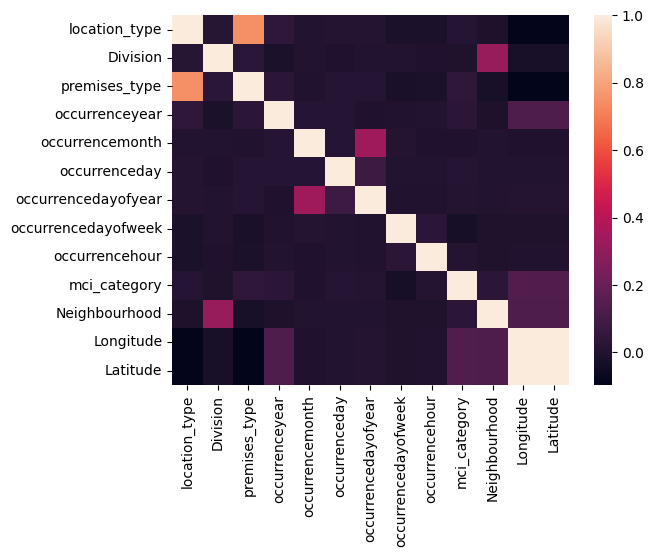

In [8]:
#Taking a look at correlation across variables
correlation = kept[['location_type', 'Division','premises_type','occurrenceyear', 'occurrencemonth', 'occurrenceday',\
                      'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'mci_category', 'Neighbourhood', 'Longitude', 'Latitude']] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()

sns.heatmap(correlation)

#So immediately we can see that mci_category doesn't seem to be correlated with much of anything. Although this could be due to the factorization of some numeric variables, the odds aren't great.

In [9]:
x = kept[['location_type', 'Division','premises_type','occurrenceyear', 'Longitude', 'Latitude']]
y = kept['mci_category']



In [10]:
onehot_encoder = OneHotEncoder(categories='auto', handle_unknown='ignore')

# Fit and transform the onehot encoder on the categorical variables
onehot_encoder.fit(x[['location_type', 'Division','premises_type','occurrenceyear']])
x_onehot = onehot_encoder.transform(x[['location_type', 'Division','premises_type','occurrenceyear']])

# Convert the one-hot encoded data to a Pandas DataFrame
x_onehot = pd.DataFrame(x_onehot.toarray(), columns=onehot_encoder.get_feature_names_out())

# Concatenate the one-hot encoded data with the other numerical variables
x = pd.concat([x_onehot, x[['Longitude', 'Latitude']]], axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [12]:
clf = DecisionTreeClassifier()

clf.fit(x_test, y_test)

DecisionTreeClassifier()

In [13]:
#Is it too big to plot?
#plot_tree(clf);

#Accuracy 0.93
accuracy = clf.score(x_test, y_test);
print('Accuracy: {:.2f}'.format(accuracy));

Accuracy: 0.93


Currently The Decision Tree's Accuracy is 0.93 which is pretty high considering the low correlation between crime categories and the other variables.
Now to test other models such as naive bayes, svms, and a logistic models(after classifying all theft under 1 category). 
I will omit using random forest as it employs multiple decision trees, and I am worried my processor will not be able to handle it, as it struggled with generating the first decision tree.